# Une introduction à la manipulation de données en Python

* l'écosystème scipy

* les bibliothèques numpy scipy et matplotlib
L'objet `ndarray`, la notion de vectorisation.

* Lecture d'un fichier excel avec pandas et xlrd
La `DataFrame` et les `Series` de pandas 


# L'écosystème scientifique Python



![the scipy ecosystem](scipy_ecosystem.png)


Toutes ces bibliothèques partagent une représentation de données communes, l'`array` numpy, mais aussi une même culture et communauté.






##  Programmation parallèle ou concurrente

- [`multprocessing`](https://docs.python.org/3/library/multiprocessing.html) & [`threading`](https://docs.python.org/3/library/threading.html)
- [Dask](https://dask.org)
- [ipyparallel](https://ipyparallel.readthedocs.io/en/latest/)


## La physique

- Algèbre linéaire, RNG, etc.: [`numpy`](https://docs.scipy.org/doc/scipy/reference/)
- ODE, fonction spéciales, interpolation, géométrie etc. [`scipy`](https://docs.scipy.org/doc/scipy/reference/)
- Éléments finis: [`SfePy`](http://sfepy.org/doc-devel/index.html)
- Mécanique des fluides: [CFD Python par Lorena Barba](https://github.com/barbagroup/CFDPython.git)


## La chimie

- [Pymol](https://pymol.org)
- [Python chemistry](https://pythoninchemistry.org/)


## Traitement d'images et vision par ordinateur

- [scikit-image](https://scikit-image.org)
- [Opencv](https://opencv.org)

## Apprentissage

- [scikit-learn](https://scikit-learn.org)

## Statistiques

- les bases: [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
- [statsmodel](https://www.statsmodels.org/stable/index.html)
- [PyMCMC](https://pymcmc.readthedocs.io/en/latest/)


## Les distributions

- [Canopy](https://www.enthought.com/product/canopy/)
- [Anaconda](https://www.anaconda.com)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
my_array = np.array([1, 2, 3])

In [3]:
my_array

array([1, 2, 3])

In [4]:
my_list = list(range(10, 10000000, 3))

In [5]:
my_array = np.array(my_list)

In [6]:
my_list[:10]

[10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

In [7]:
my_array[:10]

array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37])

In [12]:
my_list2 = [v**2 for v in my_list]

In [14]:
my_array2 = my_array**2

In [15]:
%timeit [v**2 for v in my_list]

858 ms ± 6.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%timeit my_array**2

4.41 ms ± 491 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%timeit np.array([a**2 for a in my_array])

955 ms ± 7.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
my_array.dtype

dtype('int64')

In [20]:
my_array.shape

(3333330,)

In [21]:
my_array3 = my_array.reshape([111111, 10, 3])

In [28]:
my_array3.shape

(111111, 10, 3)

In [23]:
my_square = np.array([[2, 0], [0, 2]]) 

In [24]:
my_square.shape

(2, 2)

In [25]:
list(my_square

array([[2, 0],
       [0, 2]])

In [29]:
np.zeros((10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [31]:
np.ones((3, 4, 2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]])

In [33]:
noisy = np.random.normal(scale=1, size=(256, 256))

In [37]:
np.arange(2, 12, .3)

array([ 2. ,  2.3,  2.6,  2.9,  3.2,  3.5,  3.8,  4.1,  4.4,  4.7,  5. ,
        5.3,  5.6,  5.9,  6.2,  6.5,  6.8,  7.1,  7.4,  7.7,  8. ,  8.3,
        8.6,  8.9,  9.2,  9.5,  9.8, 10.1, 10.4, 10.7, 11. , 11.3, 11.6,
       11.9])

$$f(t) = K\frac{1}{1+ae^{-rt}} $$

In [ ]:
np.exp()

In [9]:
def verhulst(t, K=1, a=1, r=1):
    """Logistic
    
    ..math:: 
    f(t) = K\frac{1}{1+ae^{-rt}}
    
    """
    return K * 1 / (1 + a*np.exp(-r*t))
    

In [10]:
ts = np.linspace(-5, 5, 2001)
verhulst(ts)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99324034, 0.99327383,
       0.99330715])

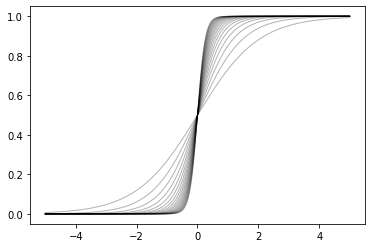

In [11]:
for r in np.linspace(1, 8, 20):
    plt.plot(ts, verhulst(ts, r=r), lw=1, c="k", alpha=0.3)

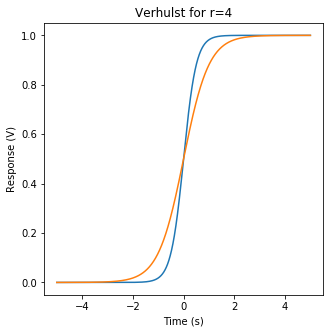

In [15]:
fig, ax = plt.subplots()
ys = verhulst(ts, r=4)
ax.plot(ts, ys)


ax.plot(ts, verhulst(ts, r=2))

ax.set_title("Verhulst for r=4")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Response (V)")

fig.set_size_inches(5, 5)
fig.savefig('verhulst.png', dpi=300)

In [16]:
line = ax.lines[0]

In [17]:
line.set_xdata(np.zeros(2001))

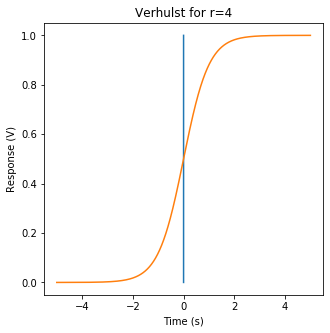

In [18]:
fig

> Exercice : lire un fichier excel avec pandas et tracer un graphe

In [20]:
ts.shape

(2001,)

In [28]:
table_data = ts[:2000].reshape((400, 5))

In [29]:
table_data

array([[-5.   , -4.995, -4.99 , -4.985, -4.98 ],
       [-4.975, -4.97 , -4.965, -4.96 , -4.955],
       [-4.95 , -4.945, -4.94 , -4.935, -4.93 ],
       ...,
       [ 4.925,  4.93 ,  4.935,  4.94 ,  4.945],
       [ 4.95 ,  4.955,  4.96 ,  4.965,  4.97 ],
       [ 4.975,  4.98 ,  4.985,  4.99 ,  4.995]])

In [37]:
table_df = pd.DataFrame(
    table_data, 
    columns=['temp', 'humidity', 'wind', 'lat', 'lon'])

In [32]:
table_df.head()

,temp,humidity,wind,lat,lon
0,-5.000,-4.995,-4.990,-4.985,-4.980
1,-4.975,-4.970,-4.965,-4.960,-4.955
2,-4.950,-4.945,-4.940,-4.935,-4.930
3,-4.925,-4.920,-4.915,-4.910,-4.905
4,-4.900,-4.895,-4.890,-4.885,-4.880


In [33]:
table_df['humidity']

0     -4.995
1     -4.970
2     -4.945
3     -4.920
4     -4.895
       ...  
395    4.880
396    4.905
397    4.930
398    4.955
399    4.980
Name: humidity, Length: 400, dtype: float64

In [34]:
table_df.index.name = 'time'

In [35]:
table_df.head()

,temp,humidity,wind,lat,lon
time,,,,,
0,-5.000,-4.995,-4.990,-4.985,-4.980
1,-4.975,-4.970,-4.965,-4.960,-4.955
2,-4.950,-4.945,-4.940,-4.935,-4.930
3,-4.925,-4.920,-4.915,-4.910,-4.905
4,-4.900,-4.895,-4.890,-4.885,-4.880


In [25]:
table[10:25, 4:6]

array([[-4.48 , -4.475],
       [-4.43 , -4.425],
       [-4.38 , -4.375],
       [-4.33 , -4.325],
       [-4.28 , -4.275],
       [-4.23 , -4.225],
       [-4.18 , -4.175],
       [-4.13 , -4.125],
       [-4.08 , -4.075],
       [-4.03 , -4.025],
       [-3.98 , -3.975],
       [-3.93 , -3.925],
       [-3.88 , -3.875],
       [-3.83 , -3.825],
       [-3.78 , -3.775]])

In [41]:
r'C:\\Users\\Guillaume\\Test'
r'C:/Users\Guillaume/Test'
r'C:\Users\Guillaume\Test'

'C:\\Users\\Guillaume\\Test'

In [81]:
series = (
    pd.read_excel('../reporter/data/series-1800-2015_simplified.xlsx')
    .set_index('année', inplace=False)
    .dropna(axis=0, how='all', inplace=False)
    .transpose()
)



In [82]:
series.dtypes

année
Prix consommation            float64
PIB                          float64
RDM                          float64
population                   float64
nb_ménages                   float64
TI_long_terme                float64
TI_court_terme               float64
Valeur_invest_actions        float64
Valeur_invest_monnaie        float64
Or                           float64
prix_logement_Fr             float64
Prix_logement_Paris          float64
valeur_invest_locatif        float64
indice_loyers                float64
ICC                          float64
conso_logements              float64
transactions_immo            float64
transactions_immo _ancien    float64
dette_immo_menages           float64
duree_prets_ancien           float64
duree_prets_neuf             float64
dtype: object

In [84]:
series.index = series.index.astype(np.int)

In [85]:
series.head()

année,Prix consommation,PIB,RDM,population,nb_ménages,TI_long_terme,TI_court_terme,Valeur_invest_actions,Valeur_invest_monnaie,Or,...,Prix_logement_Paris,valeur_invest_locatif,indice_loyers,ICC,conso_logements,transactions_immo,transactions_immo _ancien,dette_immo_menages,duree_prets_ancien,duree_prets_neuf
1800,0.000429,0.009952,0.008421,28601.353899,6882.055873,0.200361,0.06,NaN,0.000153,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,0.000442,0.010102,0.008548,28741.950591,6915.886240,0.102212,0.06,NaN,0.000163,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,0.000474,0.010253,0.008676,28883.238419,6949.882908,0.095345,0.06,3.326481e-08,0.000172,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,0.000474,0.010407,0.008806,29025.220781,6984.046694,0.097626,0.06,3.634091e-08,0.000183,0.000548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804,0.000426,0.010564,0.008938,29167.901090,7018.378421,0.091757,0.06,3.932246e-08,0.000194,0.000548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
series["PIB"] = series["PIB"].astype(np.float16)

In [88]:
series.index

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [87]:
series.dtypes


année
Prix consommation            float64
PIB                          float16
RDM                          float64
population                   float64
nb_ménages                   float64
TI_long_terme                float64
TI_court_terme               float64
Valeur_invest_actions        float64
Valeur_invest_monnaie        float64
Or                           float64
prix_logement_Fr             float64
Prix_logement_Paris          float64
valeur_invest_locatif        float64
indice_loyers                float64
ICC                          float64
conso_logements              float64
transactions_immo            float64
transactions_immo _ancien    float64
dette_immo_menages           float64
duree_prets_ancien           float64
duree_prets_neuf             float64
dtype: object

In [91]:
series.loc[1800:1810, ['PIB', 'RDM']]

année,PIB,RDM
1800,0.009949,0.008421
1801,0.010101,0.008548
1802,0.010254,0.008676
1803,0.010406,0.008806
1804,0.010567,0.008938
1805,0.010719,0.009073
1806,0.010880,0.009209
1807,0.011047,0.009347
1808,0.011215,0.009487
1809,0.011383,0.009630


In [92]:
series.iloc[0:23, 3:6]

année,population,nb_ménages,TI_long_terme
1800,28601.353899,6882.055873,0.200361
1801,28741.950591,6915.886240,0.102212
1802,28883.238419,6949.882908,0.095345
1803,29025.220781,6984.046694,0.097626
1804,29167.901090,7018.378421,0.091757
1805,29311.282779,7052.878913,0.087657
1806,29455.369293,7087.549001,0.079427
1807,29600.164099,7122.389517,0.064767
1808,29745.670678,7157.401301,0.061470
1809,29891.892528,7192.585193,0.064604


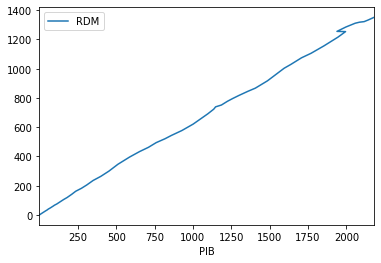

In [93]:
series.plot('PIB', 'RDM')

In [94]:
series.columns

Index(['Prix consommation', 'PIB', 'RDM', 'population', 'nb_ménages',
       'TI_long_terme', 'TI_court_terme', 'Valeur_invest_actions',
       'Valeur_invest_monnaie', 'Or', 'prix_logement_Fr',
       'Prix_logement_Paris', 'valeur_invest_locatif', 'indice_loyers', 'ICC',
       'conso_logements', 'transactions_immo', 'transactions_immo _ancien',
       'dette_immo_menages', 'duree_prets_ancien', 'duree_prets_neuf'],
      dtype='object', name='année')

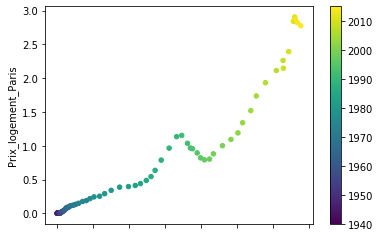

In [109]:
series.loc[1940:].plot(
    x='RDM',
    y='Prix_logement_Paris',
    c=series.loc[1940:].index,
    #s=series.loc[1940:]['dette_immo_menages']*1e-3,
    kind='scatter',
    cmap='viridis')

In [77]:
series2 = series.set_index('année', inplace=True)


In [79]:
type(series2)

NoneType

## Récupérer des données sur le web avec requests

> Exercice : Lire, mettre en forme, sauver et représenter des données web

In [115]:
link = 'http://samples.openweathermap.org/data/2.5/forecast/hourly?id=524901&appid=b6907d289e10d714a6e88b30761fae22'

In [128]:
import requests
import json

In [184]:
with requests.get(link) as response:
    print(response)
    

AttributeError: __enter__

In [125]:
response = requests.get(link)

In [126]:
response

<Response [200]>

In [129]:
content = json.loads(response.content)

In [131]:
type(content)

dict

In [132]:
type(response.content)

bytes

In [139]:
content.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [147]:
raw_data = pd.DataFrame(content['list'])

In [148]:
raw_data.head()

,clouds,dt,dt_txt,main,rain,snow,sys,weather,wind
0,{'all': 60},1553709600,2019-03-27 18:00:00,"{'temp': 272.09, 'temp_min': 271.358, 'temp_ma...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 3.25, 'deg': 287.822}"
1,{'all': 2},1553713200,2019-03-27 19:00:00,"{'temp': 271.59, 'temp_min': 271.1, 'temp_max'...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.4, 'deg': 294.075}"
2,{'all': 1},1553716800,2019-03-27 20:00:00,"{'temp': 271.15, 'temp_min': 270.907, 'temp_ma...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.47, 'deg': 300.189}"
3,{'all': 1},1553720400,2019-03-27 21:00:00,"{'temp': 270.722, 'temp_min': 270.722, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.55, 'deg': 305.558}"
4,{'all': 1},1553724000,2019-03-27 22:00:00,"{'temp': 270.63, 'temp_min': 270.63, 'temp_max...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.59, 'deg': 309.126}"


In [158]:
type(raw_data['weather'].iloc[0])

dict

In [165]:
lambda seq: seq[0]

<function __main__.<lambda>(seq)>

In [170]:
main_data = pd.DataFrame.from_records(raw_data["main"])

def first(seq):
    return seq[0]
weather_data_ = raw_data['weather'].apply(first)
# equivalent
weather_data_ = raw_data['weather'].apply(lambda seq: seq[0])
# weather_data_ est une seaquence de dictionnaires
weather_data = pd.DataFrame.from_records(weather_data_)

main_data = pd.concat((main_data, weather_data), axis=1, ignore_index=True)
main_data.set_index(raw_data['dt_txt'], inplace=True)
main_data.index = pd.DatetimeIndex(main_data.index)


In [181]:
main_data.resample('D').mean()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min,id
dt_txt,,,,,,,,,
2019-03-27,998.045000,100.0,1018.963167,1018.963167,271.100500,0.243333,271.100500,270.856333,800.500000
2019-03-28,1002.171208,100.0,1022.965167,1022.965167,271.927000,0.000000,271.927000,271.927000,794.958333
2019-03-29,999.287417,100.0,1019.671750,1019.671750,274.227667,0.000000,274.227667,274.227667,786.958333
2019-03-30,993.445375,100.0,1013.605583,1013.605583,275.650375,0.000000,275.650375,275.650375,764.750000
2019-03-31,992.348389,100.0,1012.480111,1012.480111,279.269111,0.000000,279.269111,279.269111,786.277778


In [185]:
main_data.groupby('description').mean()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min,id
description,,,,,,,,,
broken clouds,996.380741,100,1016.834074,1016.834074,274.212741,0.027037,274.212741,274.185630,803
clear sky,996.330727,100,1017.023545,1017.023545,272.111364,0.066364,272.111364,272.044727,800
few clouds,993.761000,100,1013.782000,1013.782000,275.777000,0.000000,275.777000,275.777000,801
light rain,992.520500,100,1012.638250,1012.638250,278.080750,0.000000,278.080750,278.080750,500
light snow,1001.435667,100,1021.913333,1021.913333,273.600000,0.000000,273.600000,273.600000,600
overcast clouds,998.419149,100,1018.799064,1018.799064,274.905170,0.000000,274.905170,274.905170,804
scattered clouds,990.823000,100,1010.943667,1010.943667,283.452000,0.000000,283.452000,283.452000,802
